In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df=pd.read_csv("Titanic-Dataset.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# we can remove cabin columns,PassengerId,Name,Ticket
df.drop(columns=["Cabin","Ticket","Name","PassengerId"],inplace=True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<Axes: >

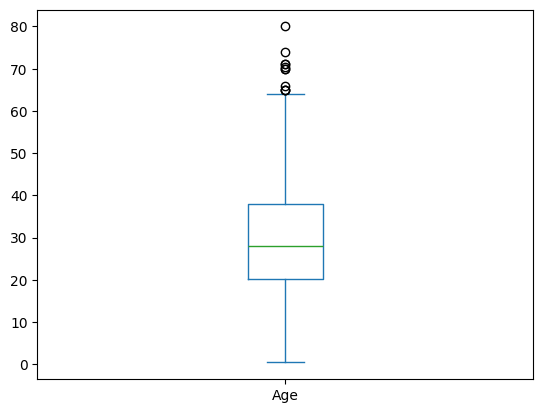

In [12]:
df["Age"].plot(kind="box")

In [13]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
df["Embarked"].mode()[0]

'S'

In [18]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [19]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: >

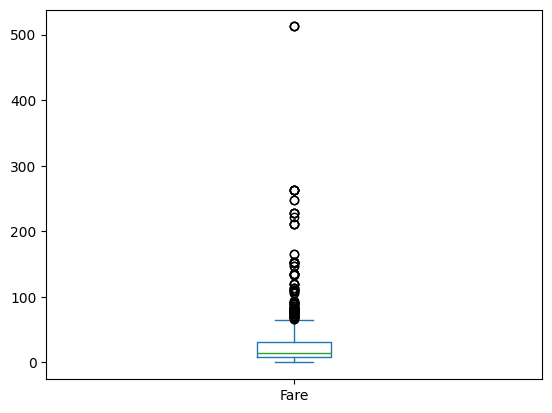

In [20]:
df["Fare"].plot(kind="box")

In [24]:
q1=df.describe()["Fare"]["25%"]

In [25]:
q3=df.describe()["Fare"]["75%"]

In [26]:
IQR=q3-q1

In [29]:
IQR

np.float64(23.0896)

In [30]:
# Let's use IQR to detect and cap the outliers
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [31]:
df["Fare"]=df["Fare"].clip(lower_limit,upper_limit)

<Axes: >

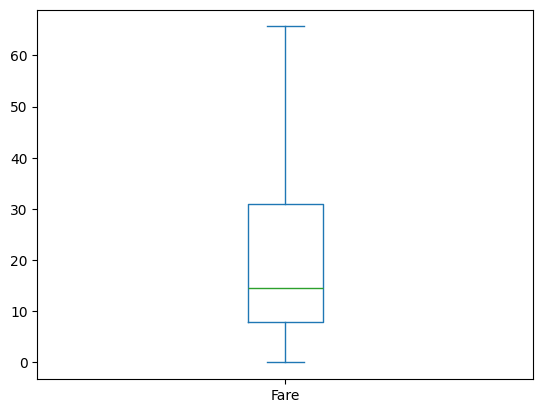

In [32]:
df["Fare"].plot(kind="box")

In [34]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
df['Age']=df['Age'].clip(lower_bound,upper_bound)

<Axes: >

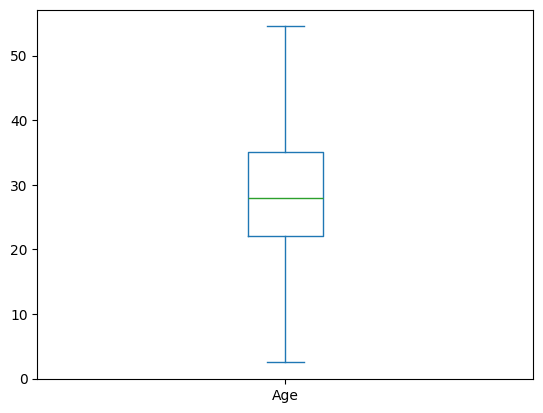

In [35]:
df["Age"].plot(kind="box")

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6344,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [37]:
# nominal(sex,Embarked) or ordinal, 
df=pd.get_dummies(df,columns=["Sex","Embarked"],drop_first=True,dtype=np.int64)

In [38]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,65.6344,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [40]:
X=df.drop(columns=["Survived"])

In [41]:
y=df["Survived"]

In [42]:
# split the dataset into 75 and 25

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [43]:
# for training -X_train,y_train
# for testing -X_test it will result in y_pred
# for evaluation - y_test, y_pred - 

from sklearn.linear_model import LogisticRegression

log=LogisticRegression()

log.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
# testing
y_pred=log.predict(X_test)

In [47]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
167    0
306    1
379    0
742    1
10     1
Name: Survived, Length: 223, dtype: int64

In [48]:
# evaluate the performance, confusion_matrix,accuracy_score, precision,recall, f1_score

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


In [49]:
confusion_matrix(y_test,y_pred)

array([[116,  23],
       [ 23,  61]])

In [67]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [84]:
y=np.array(y_test)

In [76]:
df1=pd.DataFrame(y_pred, columns=["y_pred"])

In [86]:
df2=pd.DataFrame(y,columns=["y_test"])

In [98]:
newdf=pd.concat([df1,df2],axis=1)

In [97]:
pd.set_option('display.max_rows', None)

In [99]:
newdf

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,0,1
6,1,1
7,1,1
8,1,1
9,1,1


In [90]:
df2

,y_test
0,0
1,0
2,0
3,1
4,1
...,...
218,0
219,1
220,0
221,1


In [94]:
np.concat([y,y_pred])

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,

In [50]:
accuracy_score(y_test,y_pred)
# done

0.7937219730941704

In [51]:
precision_score(y_test,y_pred)

np.float64(0.7261904761904762)

In [52]:
recall_score(y_test,y_pred)

np.float64(0.7261904761904762)

In [53]:
f1_score(y_test,y_pred)

np.float64(0.7261904761904762)

In [54]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [55]:
import gradio as gr

In [57]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,65.6344,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [56]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [58]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
log.predict([[3,22,1,0,7.2500,1,0,1]])[0]

np.int64(0)

In [61]:
def prediction(Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S):
    result=log.predict([[Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S]])[0]
    if result==0:
        return "Not Survived"
    else:
        return "Survived"

In [63]:
prediction(3,22,1,0,7.2500,1,0,1)

'Not Survived'

In [64]:
demo=gr.Interface(fn=prediction,inputs=["number","number","number","number","number","number","number","number"],
             outputs="text", title="Survival Prediction application developed using Logistic Regression")

In [65]:
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://cf0fcd0ace32b3a094.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gradio/queueing.py", line 541, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gradio/route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gradio/blocks.py", line 1928, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gradio/blocks.py", line 1514, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/shaikmujeeburrahman/Library